# Eksplorasi Data - Analisis Korelasi & Heat Map part 2
##### Notebook ini membahas Analisis Ekplorasi Data mengunakan analisis korelasi yang divisualisasikan menggunakan heatmap. Dengan menggunakan dataset mtcars, tujuan analisis ini adalah untuk mengetahui hal hal berikut:
#####     1. atribut apa saja yang mempengaruhi tenaga mobil (part 1)
#####     2. atribut apa saja yang mempengaruhi konsumsi bahan bakar (part 2)

## Deskripsi Data
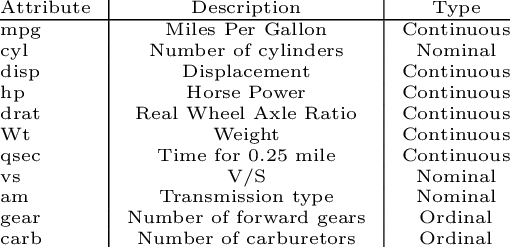
##### image source: https://www.researchgate.net/figure/mtcars-Dataset-Description_tbl2_306258000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/mtcars/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


/tmp/ipykernel_20/683334347.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

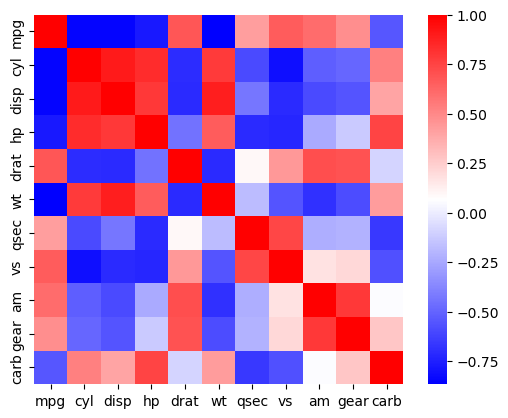

In [3]:
#Heatmap dapat digunakan untuk melakukan analisa korelasi antar variabel (kolom)
#secara keseluruhan pada dataframe
corr = df.corr()
sns.heatmap(data = corr, square = True, cmap = 'bwr')

##### TENAGA MESIN (hp)
##### heatmap diatas menunjukkan bahwa terdapat beberapa variabel yang berkorelasi positif kuat (gradasi warna merah r > 0) terhadap tenaga mesin (hp) yaitu: cyl, disp, wt, dan carb. Hasil tersebut dapat diinterpretasikan bahwa semakin tinggi tenaga mesin (hp) maka nilai cyl, disp, wt, dan carb akan meningkat

##### JARAK TEMPUH/MIL (mpg)
##### untuk atribut mpg, saya tertarik untuk melihat variabel berkorelasi negatif kuat (gradasi warna biru r < 0) yang mengindikasikan bahwa terjadi pengurangan jarak tempuh/mil (pemborosan) yaitu cyl, disp, hp,wt, dan carb. Hasil tersebut dapat diindikasikan bahwa semakin tinggi konsumsi bensin/mil maka nilai cyl, disp, hp, wt, dan carb semakin kecil.

## Analisa Korelasi Detail jarak tempuh/gallon (mpg)
#### Gambar dibawah menunjukkan visualisasi data yang memiliki korelasi negatif

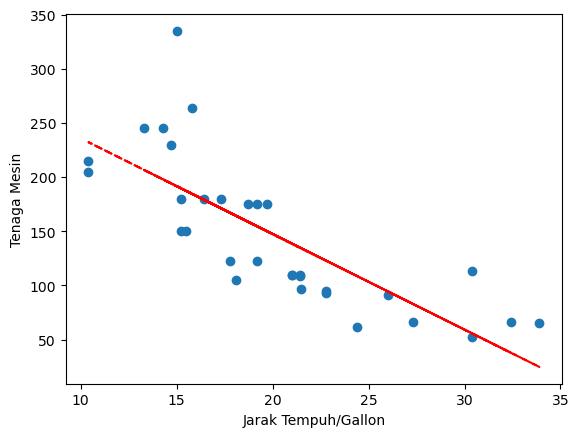

In [4]:
data = df[['mpg','hp']]
x = data['mpg']
y = data['hp']
plt.scatter(x,y)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.xlabel('Jarak Tempuh/Gallon')
plt.ylabel('Tenaga Mesin')

plt.show()

##### korelasi negatif kuat muncul saat nilai variabel x (Jarak Tempuh/Gallon) semakin besar namun nilai variabel y (Tenaga Mesin) semakin kecil. interaksi kedua variabel tersebut membentuk garis tren yang menurun. Sehingga korelasi negatif dapat di intepretasikan sebagai berikut: "semakin tinggi jarak tempuh/gallon, semakin lemah tenaga mesin"

### Analisa Korelasi Detail untuk Jarak Tempuh/Gallon (mpg)
#### Tenaga mesin (hp) terhadap jarak tempuh/gallon (mpg)

In [5]:
df[['hp','mpg']].corr()

,hp,mpg
hp,1.000000,-0.776168
mpg,-0.776168,1.000000


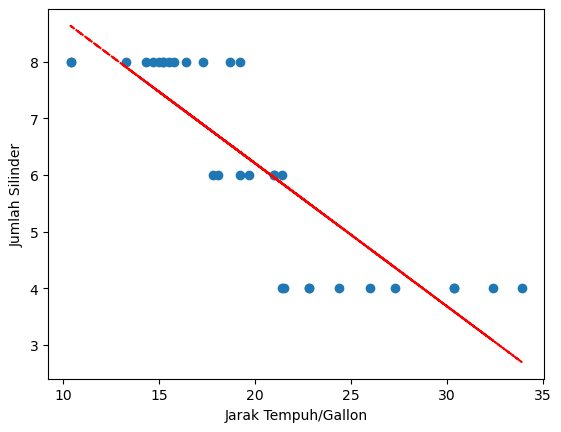

In [6]:
x = df['mpg']
y = df['cyl']
plt.scatter(x,y)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.xlabel('Jarak Tempuh/Gallon')
plt.ylabel('Jumlah Silinder')

plt.show()

In [7]:
df[['cyl','mpg']].corr()

,cyl,mpg
cyl,1.000000,-0.852162
mpg,-0.852162,1.000000


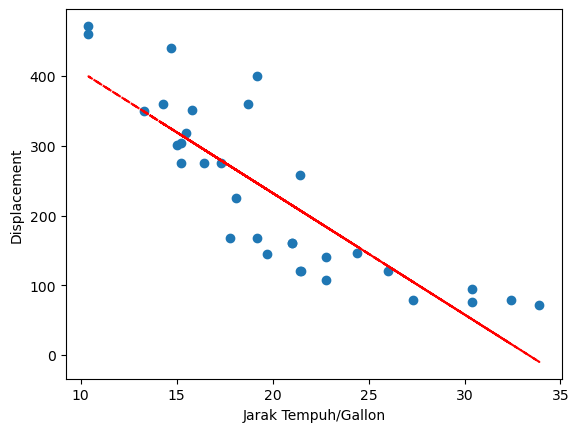

In [8]:
x = df['mpg']
y = df['disp']
plt.scatter(x,y)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.xlabel('Jarak Tempuh/Gallon')
plt.ylabel('Displacement')

plt.show()

In [9]:
df[['disp','mpg']].corr()

,disp,mpg
disp,1.000000,-0.847551
mpg,-0.847551,1.000000


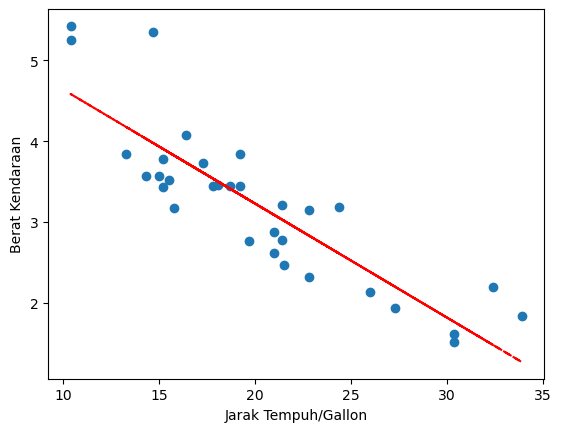

In [10]:
x = df['mpg']
y = df['wt']
plt.scatter(x,y)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.xlabel('Jarak Tempuh/Gallon')
plt.ylabel('Berat Kendaraan')

plt.show()

In [11]:
df[['wt','mpg']].corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


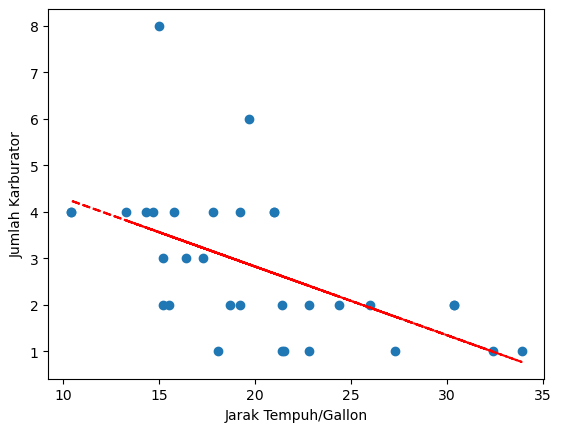

In [12]:
x = df['mpg']
y = df['carb']
plt.scatter(x,y)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.xlabel('Jarak Tempuh/Gallon')
plt.ylabel('Jumlah Karburator')

plt.show()

In [13]:
df[['carb','mpg']].corr()

,carb,mpg
carb,1.000000,-0.550925
mpg,-0.550925,1.000000


##### Hasil analisa diatas menunjukkan bahwa terdapat tiga variabel yang berkorelasi negatif sangat kuat (-0.80 < r < -0.99) terhadap jarak tempuh/gallon (mpg) yaitu jumlah silinder (cyl), displacement (disp), dan berat kendaraan (wt). Sedangkan tenaga mesin memiliki korelasi negatif kuat (-0.60 < r < -0.79) terhadap jarak tempuh/gallon (mpg). Jumlah karburator memiliki korelasi negatif sedang (-0.40 < r < -0.59) terhadap jarak tempuh/gallon

#### SPECIAL NOTE
##### kekuatan korelasi divisualisasikan dengan seberapa jauh/dekat titik-titik data tersebar pada scatter diagram. Semakin "rapat/padat" sebaran titik data,maka data tersebut dapat memiliki korelasi yang kuat (perlu dibuktikan dengan analisa korelasi). Bandingkan scatter diagram carb vs mpg dengan wt vs mpg. Titik-titik data terlihat lebih tersebar pada carb vs mpg,sedangkan wt vs mpg terlihat lebih rapat.

## KESIMPULAN
##### Kasus ini berfokus pada eksplorasi data untuk menemukan variabel - variabel yang berpengaruh terhadap jarak tempuh/gallon (mpg) menggunakan koefisien korelasi. Lebih lanjut, kasus ini menganalisa variabel-variabel yang dapat mengurangi jarak tempuh/gallon (menyebabkan konsumsi bahan bakar lebih tinggi) yang ditunjukkan dengan variabel berkorelasi negatif. Analisa saat ini menunjukkan bahwa terdapat empat variabel yang memiliki korelasi negatif terhadap jarak tempuh/gallon (mpg) diurutkan dari korelasi tertinggi - terendah, yaitu : (1) berat kendaraan (wt); (2) jumlah silinder (cyl); (3) Displacement (disp); (4) tenaga mesin (hp); dan (5) jumlah karburator (carb).

#### Langkah Selanjutnya
##### 1. membangun model prediksi berdasarkan variabel-variabel yang ada